In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt

#parr = np.loadtxt('MW_Cepheids.dat', usecols = 1)
#print(parr)

#logP = np.loadtxt('ngc4527_cepheids.dat', usecols = 1)
#print(logP)

rec_vel = np.loadtxt('other_galaxies.dat', usecols = 1)
print(rec_vel)

dist = np.loadtxt('other_galaxies.dat', usecols = 2)
print(dist)

dist_err = np.loadtxt('other_galaxies.dat', usecols = 3)
print(dist_err)

[ 427. 1510. 1152. 1152. 1152.  170.  303.]
[10.14 20.64 13.58 14.4  19.41  3.66  4.11]
[0.29 1.22 0.29 0.34 0.92 0.13 0.1 ]


optimised models chi-squared reduced = 0.517145254724091
alpha= -2.4022817223445783 ± 0.23468436665692607  Beta is -1.6102611256073684 ± 0.04984319379941516
The covariance between alpha and beta is: 0.0010386417751824975  its very close to zero so we can treat the variables as independent


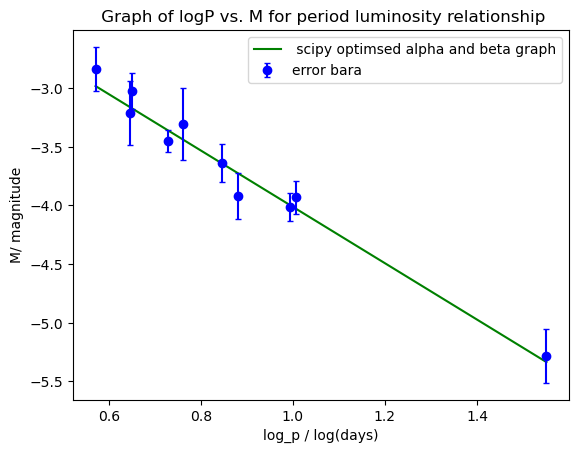

Distance of galaxy(step 2) =  14.448147729843166 ±  0.5360871071593271
Hubble constant (step 3) 83.11721010888682 ±  3.081701758296758
Hubble constant chi reduced is:  62.09042312417291  This is a very bad fit for an astronomical dataset


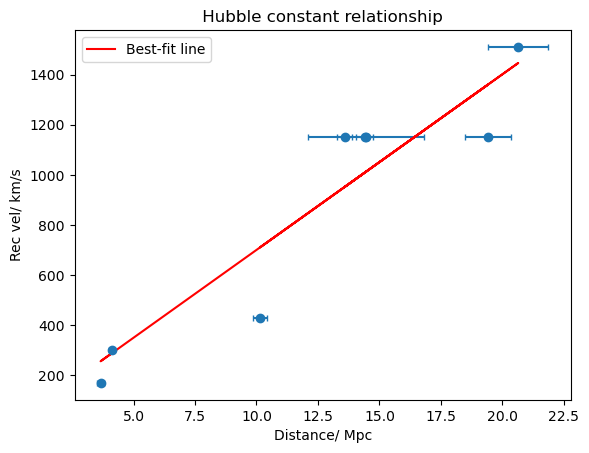

H_0 is [70.04389624] ±  [[0.01087225]]  error is too low
actual error should be around 3.9268370114095457


'\nprint(M_mu)\nprint(M_optm)\nprint(dist_err)'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt

parr = np.loadtxt('MW_Cepheids.dat', usecols = 1)
parr_err = np.loadtxt('MW_Cepheids.dat', usecols = 2)
period = np.loadtxt('MW_Cepheids.dat', usecols = 3)
m = np.loadtxt('MW_Cepheids.dat', usecols = 4)
A = np.loadtxt('MW_Cepheids.dat', usecols = 5)
err_A = np.loadtxt('MW_Cepheids.dat', usecols = 6)

Npoints = len(parr) # no of data points in MW_cepheids dataset

M_mu = np.zeros(Npoints) # mean value from normal distrubution of each star
M_std = np.zeros(Npoints) # std from normal dist. of each star

for i in range(0,Npoints):
  ''' to get error propogation with my values - assumed in instruction that errors are Gaussian
   numpy arrays explained: log_d is log(distance), log p is log(period), A_extinction is a placeholder variable for the extinction
   output: M is the absolute magnitude of the star'''

  parallax = np.random.normal(parr[i] , parr_err[i], size = 10000) # Gaussian parallax

  log_d = np.log10(1000/parallax) # gaussian log(distance)

  A_extinction = np.random.normal(A[i], err_A[i], size = 10000) # Gaussain extintion
  M = m[i] - 5*log_d + 5 - A_extinction# Gaussian absolute magnitude calculation

  M_mu[i] = np.mean(M) # appending
  M_std[i] = np.std(M) # appending

log_p = np.log10(period) # log(period)



def M_calc_optm(alpha,log_p, beta):
  '''Function : get optimal values of M
  inputs: logP, alpha (slope), beta (y-intercept)
  outputs: M '''
  return log_p * alpha + beta

# curve_fit
log_p_no_covar = log_p - np.mean(log_p) #  this gets rid of co-variance
vars, covar = opt.curve_fit(M_calc_optm, log_p_no_covar, M_mu, sigma = M_std, absolute_sigma = True)
alpha,beta = vars
beta_adjusted = beta - alpha * np.mean(log_p) # y = mx + beta - (alpha*logP_mean)
perr = np.sqrt(np.diag(covar))
alpha_unc, beta_unc = perr
M_optm = alpha*log_p + beta_adjusted # optimal value of absolute magnitude


def chi2_reduced(M_mu,M_optm,M_unc, dof):

  ''' Function: general function for chi2 reduced for any dataset
  inputs : "var_mu, var_optm, var_unc"
  outputs: chi2 reduced value
  comments : I have kept the function in terms of M.. because it helped me contextualise the function for future use  '''
  return np.sum((((M_optm - M_mu)**2.0)/((M_unc**2))))/dof
chi_redu = chi2_reduced(M_mu,M_optm,M_std, len(log_p) - 2)
print('optimised models chi-squared reduced =',chi_redu)

#plotting data
plt.plot(log_p, M_optm, color = 'green', label = ' scipy optimsed alpha and beta graph')
plt.errorbar(log_p, M_mu, yerr = M_std, color = 'blue', fmt = 'o', label = 'error bara', capsize = 2.5) # plotting M_optm insted gives all pointns lying on line of best fit
print('alpha=',alpha ,'±', alpha_unc, ' Beta is',beta_adjusted, '±', beta_unc)
print('The covariance between alpha and beta is:', covar[0,1], ' its very close to zero so we can treat the variables as independent')
plt.xlabel('log_p / log(days)')
plt.ylabel('M/ magnitude')
plt.title(' Graph of logP vs. M for period luminosity relationship')

plt.legend()
plt.show()

############################# Step 2(finding distance f galaxy) and step 3 part 1 (finding Hubble's constant) -I combined step 2 and step 3 part 1 together makes the code smaller.


logP = np.loadtxt('ngc4527_cepheids.dat', usecols = 1)
m_ngc =np.loadtxt('ngc4527_cepheids.dat', usecols = 2) # absolute magnitude, m
A_mw = 0.0682

#removing anomalies
logP = np.delete(logP, (-2,-10,6)) # i did this by first looking at results and then finding which indexes of distances_of_stars and H_0_mu which were very anomalous
m_ngc = np.delete(m_ngc, (-2,-10,6))

Ndata = len(logP) # no' of data points in dataset
distances_of_stars = np.zeros(Ndata)
distances_error = np.zeros(Ndata)

v_rec = 1152
H_0_mu = np.zeros(Ndata) # mean value of Hubble constant from a normal distribution for each star
H_0_err = np.zeros(Ndata) # error in Hubble constant for normal dustribution of each star

for i in range(Ndata):

  '''
  input: Ndata - no. of datapoints
  outputs : d => distance of star from Earth
  comments: Combined steps 2 (finding distance of galaxy) and step 3 part 1 (finding Hubble's constant)
'''

  alpha_ = np.random.normal(alpha, alpha_unc, size = 10000)
  beta_ = np.random.normal(beta_adjusted, beta_unc, size = 10000)

  d = 10**((alpha_*logP[i] + beta_ - m_ngc[i] -5 +A_mw)/-5)*10**-6 #  10**-6 for converting pc to Mpc
  distances_of_stars[i] = d.mean()
  distances_error[i] = d.std()

#this is now step 3 part 1 - finding Hubble's constant #################################
  H_0 = v_rec / d # hibble's constant
  H_0_mu[i] = H_0.mean()
  H_0_err[i] = H_0.std()

#print('distance error', distances_error)
d_mean = np.average(distances_of_stars, weights = distances_error)
#print('d_mean', d_mean)
d_stand_err = distances_error.mean()/np.sqrt(Ndata) # standardised error of galaxy fom Earth

H_0_pred = np.average(H_0_mu, weights = H_0_err) # Mean value of H_0 of galaxy by taking mean of H_0 from all stars in galaxy
H_0_stand_err = H_0_err.mean()/np.sqrt(Ndata) # standardised error in hubble's constant

print('Distance of galaxy(step 2) = ', d_mean,'± ', d_stand_err)
print('Hubble constant (step 3)',H_0_pred, '± ', H_0_stand_err)
### I combined step 2 and step 3 part 1 together makes the code smaller. Less stuff in code
#plt.scatter(distances_of_stars, v_rec + np.zeros)

################################################################## Step 3 part 2
rec_vel = np.loadtxt('other_galaxies.dat', usecols = 1) # recessional velocity
rec_vel = np.append(1152, rec_vel) # adding data from previous ngc4527 dataset

#dist = pd.read_excel('other_galaxies.xlsx', usecols = [2]).to_numpy()
dist = np.loadtxt('other_galaxies.dat', usecols = 2) # dist of galaxy
dist = np.append(d_mean, dist)

dist_err = np.loadtxt('other_galaxies.dat', usecols = 3) # error in distance
dist_err = np.append(distances_error.mean(), dist_err)
Nnodes = len(rec_vel) # no. of data points in the other_galaxies dataset

def Hubble_const(Nnodes, rec_vel, dist, dist_err):
  '''
  Aim of this function is to get the errors in hubble constant
  ,since the curve_fit method gives uncertanties that are too small,
  Hub_mu is the mean value of hubble constant from normal distribution -(not needed for this code, hence, it has been marked out),
   Hub_err is the error in distribution of Hubble constant,
   dist_errors is to store the error in distance '''
  '''
  inputs : Nondes - no' of data points; rec_vel - array of recessional velocities;
   dist and dist_err - arrays of distances of galaxies and their errors
   outputs : Hub_mu -  Mean Hubble constant derived from each galaxy; Hub_err - Hubble const. error(std) for each galaxy
   , d_err is error(std) in the distance of galaxy

  '''

  Hub_mu = np.zeros(Nnodes) # hubble constant mean for each galaxy
  Hub_err = np.zeros(Nnodes) # hubble constant error for each galaxy
  dist_errors = np.zeros(Nnodes)
  for i in range(Nnodes):
    distance = np.random.normal(dist[i], dist_err[i], size = 10000)
    dist_errors[i] = distance.std()
    Hub_mu[i] = np.mean(rec_vel[i] / distance)
    Hub_err[i] = np.std(rec_vel[i] / distance)
    Hub_mu[-1] = H_0_pred # adding H_0 form the ngc4527 dataset
    Hub_err[-1] = H_0_stand_err # adding H_0 error from ngc 4527 dataset
  return Hub_mu, Hub_err, dist_errors, distance
H_0_vals, H_0_errors, d_err, d = Hubble_const(Nnodes,rec_vel, dist, dist_err)

def H_0_optm(H_0,d):
  ''' v = H_0 * d'''
  return d*H_0

H_0_galxs_optm, covar_H = opt.curve_fit(H_0_optm, dist, rec_vel, sigma = d_err, absolute_sigma = True)
'''H_0_galxs_optm is the optimal value of Hubble constant for the galaxies given'''

plt.errorbar(dist, rec_vel, xerr = d_err, fmt = 'o', capsize = 2.5)
vel_rec_optm = H_0_galxs_optm * dist # optimal recessional velocity using optimal value of H_0. - use equation v = H_0 * d, to plot a line of best fit
plt.plot(dist, vel_rec_optm, color='red', label='Best-fit line')
plt.title(' Hubble constant relationship ')
'''
print('H_0_vals', H_0_vals)
print('H_0_galxs', H_0_galxs_optm)'''

dist_model_optm = rec_vel/H_0_galxs_optm # distances predicted by model
chi2_hubble_constant = chi2_reduced(dist, dist_model_optm, d_err, Nnodes -1) # Nnodes - 1 --> the degrees of freedom
#print(d_err)
print('Hubble constant chi reduced is: ', chi2_hubble_constant,' This is a very bad fit for an astronomical dataset')
plt.xlabel('Distance/ Mpc')
plt.ylabel('Rec vel/ km/s')
plt.xlabel('Distance/ Mpc')
plt.ylabel('Rec vel/ km/s')
plt.legend()
plt.show()
print('H_0 is', H_0_galxs_optm,'± ', np.sqrt(covar_H),' error is too low') # error is too
print('actual error should be around', H_0_errors.mean()) # actual uncert. according to Google is about 3% of H_0 which, in this case should be 2.1 Km/s/Mpc

'''
print(M_mu)
print(M_optm)
print(dist_err)'''